In [48]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [49]:
matplotlib.rc('font', size=20)

In [8]:
!ls ../scenario_gender/data/*.csv

../scenario_gender/data/gender_test_kaggle_sample_submission.csv
../scenario_gender/data/gender_train.csv
../scenario_gender/data/tr_mcc_codes.csv
../scenario_gender/data/tr_types.csv
../scenario_gender/data/transactions.csv


In [16]:
data_gender = pd.read_csv('../scenario_gender/data/transactions.csv')

data_gender = data_gender.assign(trx_cnt=1).groupby('customer_id')['trx_cnt'].count().values

data_gender

In [19]:
!ls ../scenario_age_pred/data/*.csv

../scenario_age_pred/data/small_group_description.csv
../scenario_age_pred/data/test.csv
../scenario_age_pred/data/train_target.csv
../scenario_age_pred/data/transactions_test.csv
../scenario_age_pred/data/transactions_train.csv


In [23]:
data_age_pred = pd.concat([
    pd.read_csv('../scenario_age_pred/data/transactions_train.csv'),
    pd.read_csv('../scenario_age_pred/data/transactions_test.csv'),
], axis=0)

data_age_pred = data_age_pred.assign(trx_cnt=1).groupby('client_id')['trx_cnt'].count().values

data_age_pred

array([889, 729, 748, ..., 715, 782, 876])

In [25]:
!ls ../scenario_bowl2019/data/*.csv

../scenario_bowl2019/data/sample_submission.csv
../scenario_bowl2019/data/specs.csv
../scenario_bowl2019/data/test.csv
../scenario_bowl2019/data/test_ids.csv
../scenario_bowl2019/data/train.csv
../scenario_bowl2019/data/train_labels.csv


In [30]:
data_bowl = pd.concat([
    pd.read_csv('../scenario_bowl2019/data/train.csv'),
    pd.read_csv('../scenario_bowl2019/data/test.csv'),
], axis=0)

data_bowl = data_bowl.assign(trx_cnt=1).groupby('installation_id')['trx_cnt'].count().values

data_bowl

array([1357,  181, 3801, ...,    3,  173,  251])

In [28]:
!ls ../scenario_rosbank/data/*.csv

../scenario_rosbank/data/test.csv      ../scenario_rosbank/data/train.csv
../scenario_rosbank/data/test_ids.csv


In [31]:
data_rosbank = pd.concat([
    pd.read_csv('../scenario_rosbank/data/train.csv').drop(columns=['target_flag', 'target_sum']),
    pd.read_csv('../scenario_rosbank/data/test.csv'),
], axis=0)

data_rosbank = data_rosbank.assign(trx_cnt=1).groupby('cl_id')['trx_cnt'].count().values

data_rosbank

array([  5, 104, 199, ..., 107,  24,  80])

In [32]:
!ls ../scenario_x5/data/*.csv

../scenario_x5/data/clients.csv
../scenario_x5/data/products.csv
../scenario_x5/data/purchases.csv
../scenario_x5/data/uplift_sample_submission.csv
../scenario_x5/data/uplift_test.csv
../scenario_x5/data/uplift_train.csv


In [33]:
data_x5 = pd.read_csv('../scenario_x5/data/purchases.csv')

data_x5 = data_x5.assign(trx_cnt=1).groupby('client_id')['trx_cnt'].count().values

data_x5

array([ 52, 162,  56, ...,  60,  99, 203])

In [65]:
data = [
    ('Age group', data_age_pred),
    ('Rosbank', data_rosbank),
    # ('Gender', data_gender),
    ('Assessment', data_bowl),
    ('Retail', data_x5),
]

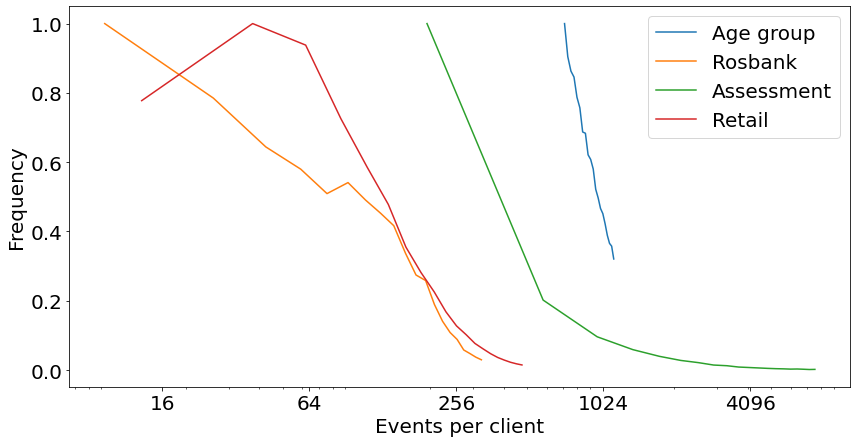

In [67]:
with matplotlib.rc_context() as rc:
    matplotlib.rc("figure", figsize=(14,7))
    matplotlib.rc('font', size=20)
    
    fig, ax = plt.subplots(1, 1)
    for n, x in data:
        hist, bins = np.histogram(x, bins=20, range=(np.min(x), np.percentile(x, 99)))
        plt.plot((bins[:-1] + bins[1:]) / 2, hist / hist.max(), label=n)
    plt.legend()
    
    ax.set_xlabel('Events per client')
    plt.xscale('log')
    
    ax.set_ylabel('Frequency')
    
    ax.set_facecolor('white')

    x_ticks = [2 ** i for i in range(4, 14, 2)]
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    plt.savefig('all_scenario_events_per_client.pdf', format='pdf', bbox_inches='tight')
